In [1]:
from simulator import HathorSimulator, Miner, TxGenerator
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

In [2]:
sim = HathorSimulator(block_weight=20.30)

g1 = TxGenerator(tx_lambda=1., hashpower=10000)
sim.add_tx_generator(g1)

In [3]:
sim.run(3600*12, report_interval=3600*24)
print(len(sim.blocks), len(sim.transactions))

(0, 43381)


In [8]:
print(sim.block_weight)

20.3


In [4]:
print(sim.min_weight_confirmed)

22.9088092611


In [5]:
nodes = sim.transactions + sim.blocks
nodes.sort(key=lambda x: x.time)

In [6]:
v = [tx.extras['confirmed_time'] - tx.time for tx in nodes if tx.type == 'tx' and 'confirmed_time' in tx.extras]

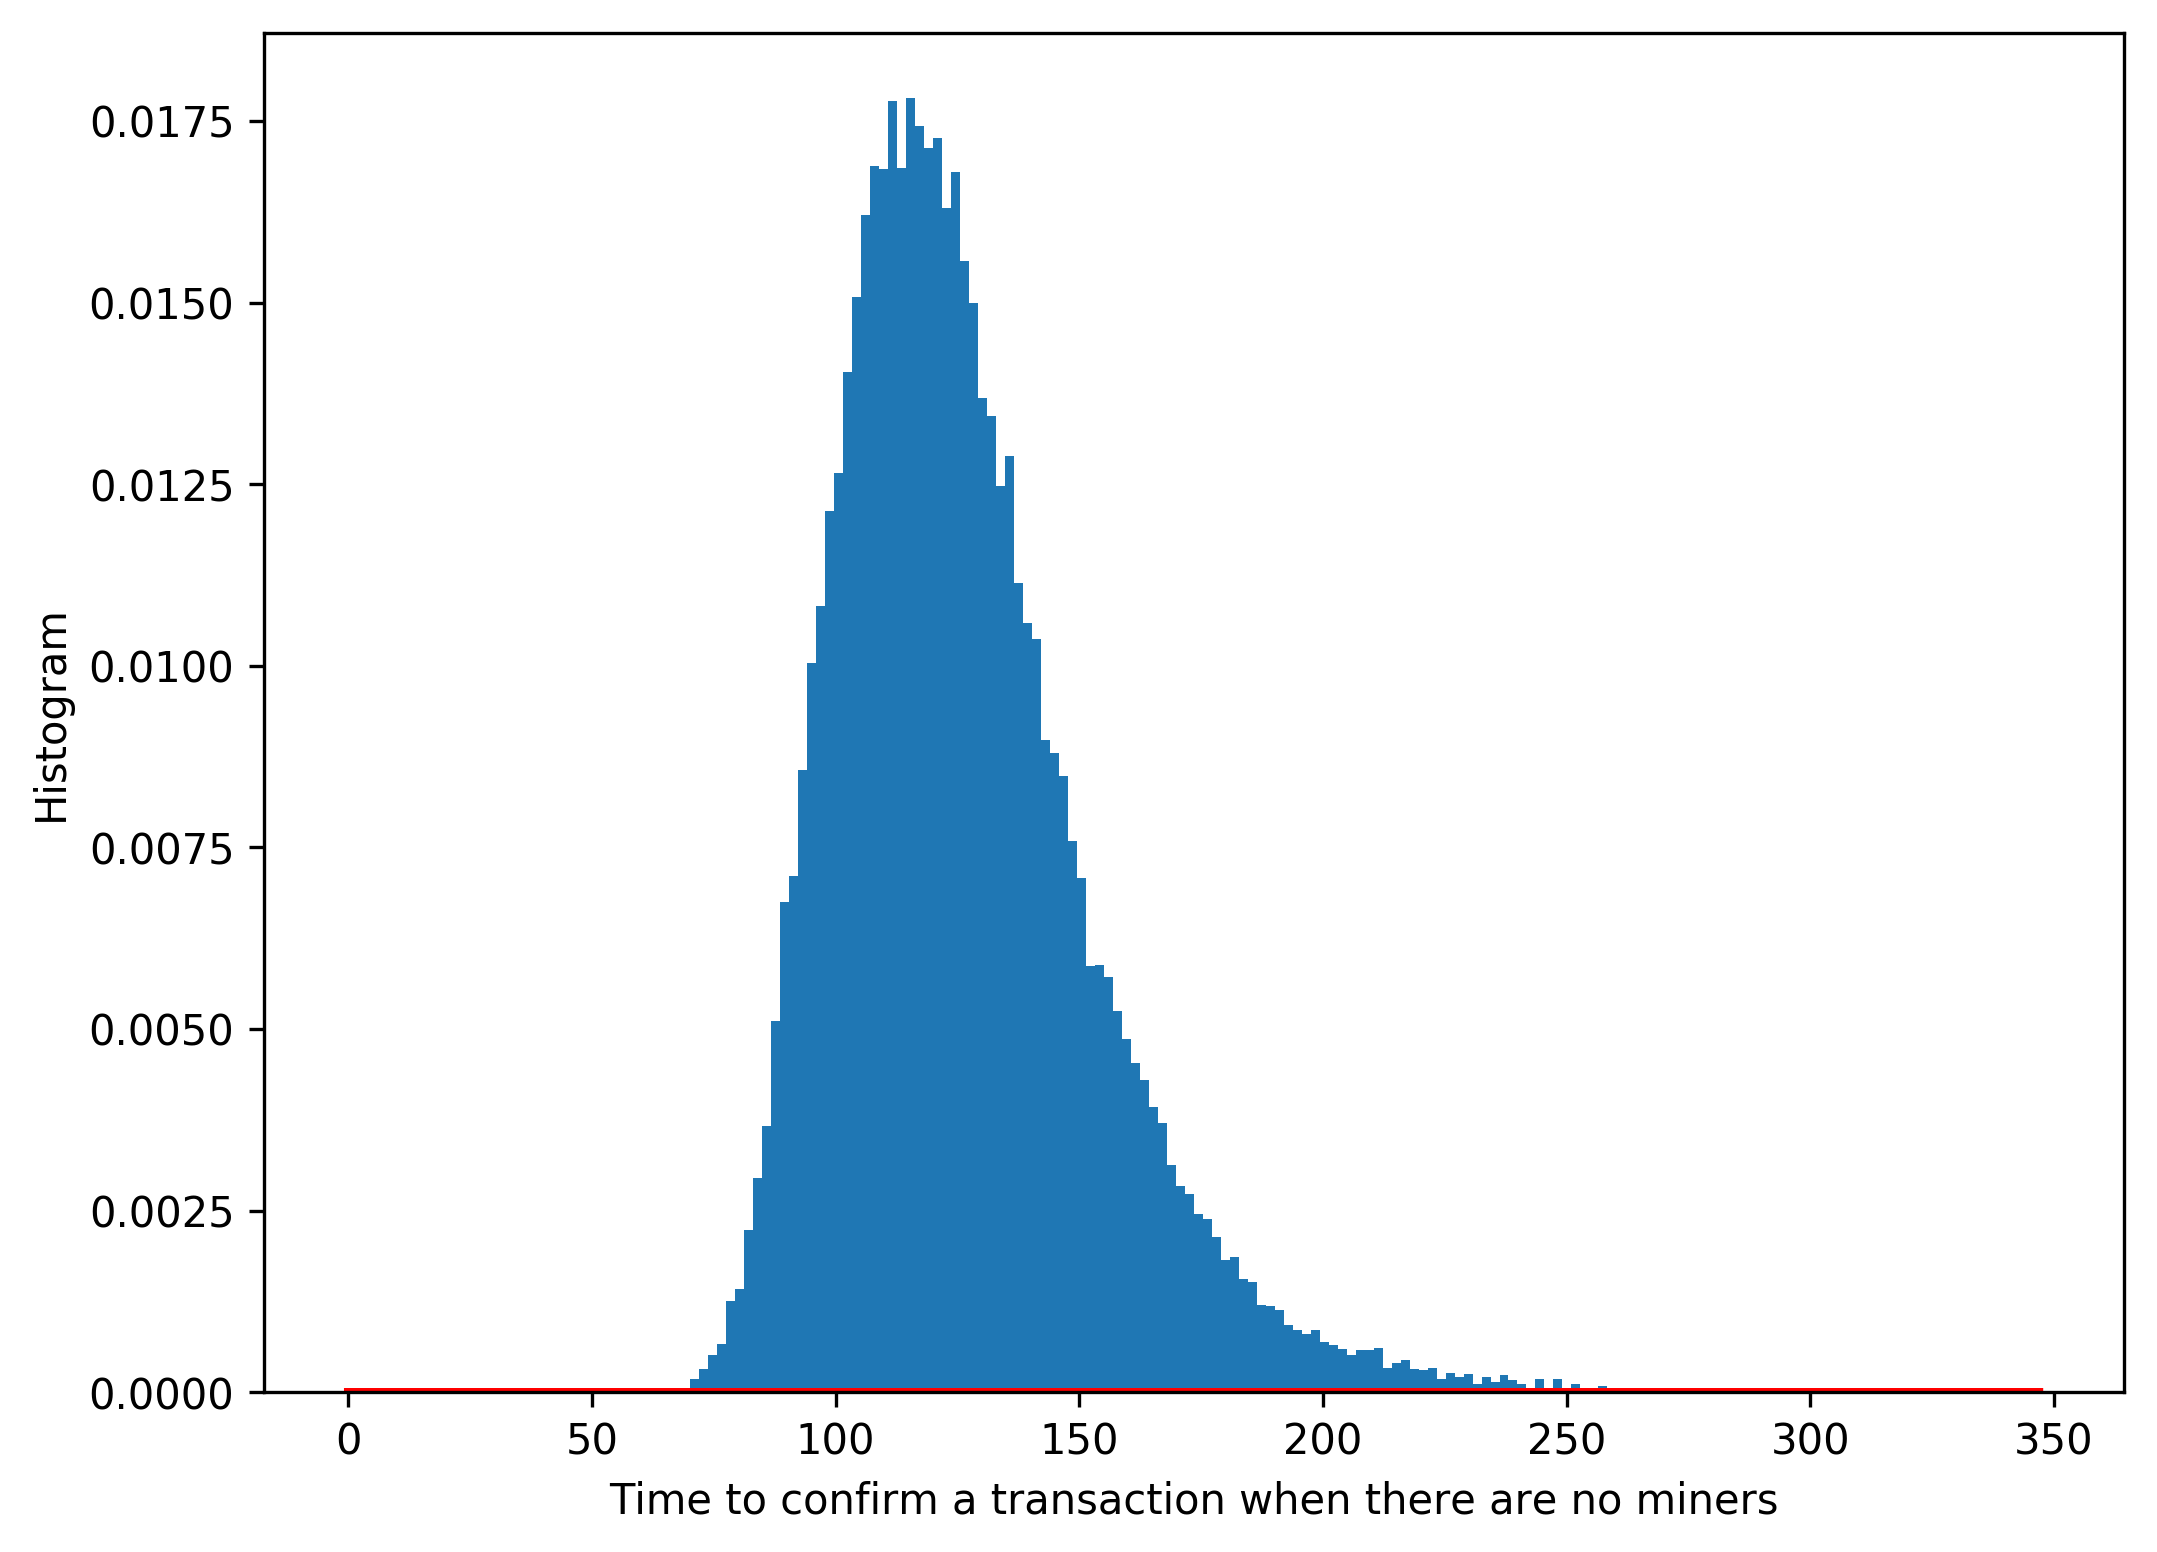

In [31]:
plt.figure(figsize=(8, 6), dpi=300)
plt.hist(v, bins='fd', density=True);

x = np.linspace(0, max(v), 10000)
y = scipy.stats.nbinom.pmf(x, 61, 2**(-17))
plt.plot(x, y, 'r', linewidth=2);

plt.ylabel('Histogram')
plt.xlabel('Time to confirm a transaction when there are no miners');

In [ ]:
print(sim.block_weight, sim.min_weight_confirmed)
for tx in nodes:
    if 'confirmed_time' in tx.extras:
        dt = tx.extras['confirmed_time'] - tx.time
        if dt > 1000:
            print(tx.name, tx.type, tx.weight, tx.acc_weight, dt)

In [ ]:
for tx in sim.blocks:
    print(tx.name, tx.weight, tx.acc_weight)

In [ ]:
dot = sim.gen_dot()
#dot.attr(rankdir='RL')
dot.attr(rankdir='BT')
dot.attr(size='200, 30')

#print(dot.render())
print(dot.source)